## Analysis of South Bend Police Department Recruitment

<ol>
<li>What methods is the department using to recruit?</li>
<li>Where are most candidates dropping off in the recruitment process?</li>
<li>Over the three years of available data, how have the dropoff amounts changed?</li>
<li>Can I conclude that the South Bend PD has made a good faith effort to promote diversity?</li>
</ol>

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv('SBPD_Recruitment_Data.csv')

In [201]:
df.head()

,Applicant_ID,Applicant_City,Applicant_State__Region,Applicant_Zip_Postal_Code,Position_Title,Req_Number,Location,Division,Applicant_Status,Last_Hiring_Stage,Source,Applicant_Apply_Method,Entry_Date,Ethnicity,Gender,EEO_Veteran_Status__Pre_Offer_,Cycle,ObjectId
0,63217447,Mill Creek,IN,46365,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Word of Mouth,Mobile,2018-10-29T23:43:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,1
1,51041583,Walkerton,IN,46574,Police Officer Recruit,PUB-17-00002,South Bend Police Department,Police,Hired,"Passed Polygraph, Medical, Psych, and Hired",Job/Career Fair,Web,2017-05-08T15:05:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Fall 2017,2
2,63244731,Bedford,IN,47421,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Other,Web,2018-10-31T06:36:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,3
3,63326694,Mishawaka,IN,46544,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Company Website,Web,2018-11-05T13:28:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,4
4,50555166,Niles,MI,49120,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Internet/Job Board,Mobile,2018-11-06T14:00:00.000Z,Black or African American (Not Hispanic or Lat...,Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,5


In [202]:
# assign hiring cycles into years

df.loc[df['Cycle'].str.contains('2017'), 'Year'] = 2017
df.loc[df['Cycle'].str.contains('2018'), 'Year'] = 2018
df.loc[df['Cycle'].str.contains('2019'), 'Year'] = 2019
# change year to int data type
df['Year'] = df['Year'].astype(int)

## Ethnicity analysis

In [203]:
# how many applicants do not provide any ethnicity?
np.sum(df['Ethnicity'].isna())

375

In [204]:
# add "No Response" in place of NaN so that quantity will be captured in pie chart

df.loc[df['Ethnicity'].isna(), 'Ethnicity'] = 'No Response'

In [205]:
# how is ethnicity distributed by applicant?
df['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                                        955
No Response                                                           375
Black or African American (Not Hispanic or Latino)                    280
Hispanic or Latino                                                    128
Two or More Races (Not Hispanic or Latino)                             62
Prefer not to answer                                                   23
Asian (Not Hispanic or Latino)                                         20
American Indian or Alaska Native (Not Hispanic or Latino)               7
Native Hawaiian or Other Pacific Islander (Not Hispanic or Latino)      2
Unknown                                                                 1
Name: Ethnicity, dtype: int64

In [206]:
# copy series and translate into df
ethnicity_counts = df['Ethnicity'].value_counts().reset_index().copy()

In [207]:
# summarize all ethnicities other than the top 3
ethnicity_counts = ethnicity_counts.iloc[0:4].append(ethnicity_counts.iloc[4:10].sum(), ignore_index=True)
ethnicity_counts.iloc[4,0] = 'Other'

In [208]:
# verify everything looks as it should
ethnicity_counts

,index,Ethnicity
0,White (Not Hispanic or Latino),955
1,No Response,375
2,Black or African American (Not Hispanic or Lat...,280
3,Hispanic or Latino,128
4,Other,115


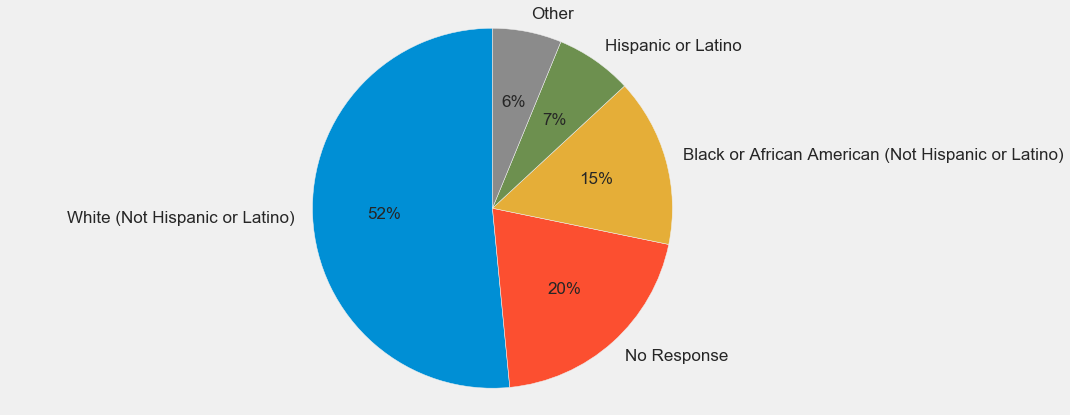

In [209]:
fig1, ax1 = plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')

ax1.pie(ethnicity_counts['Ethnicity'], 
        labels=ethnicity_counts['index'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# plt.savefig("visualizations/ethnicity of applicant1.png", bbox_inches='tight')

### How has the count and percent of applications by different ethnicities changed over time?

In [210]:
# how do applicant status distributions differ by ethnicity?
app_status_by_ethnicity = df[['Ethnicity', 'Applicant_Status', 'Year']].copy()

In [211]:
#verify I have the data I need
app_status_by_ethnicity.head()

,Ethnicity,Applicant_Status,Year
0,White (Not Hispanic or Latino),AP - Incomplete,2019
1,White (Not Hispanic or Latino),Hired,2017
2,White (Not Hispanic or Latino),AP - Incomplete,2019
3,White (Not Hispanic or Latino),AP - Incomplete,2019
4,Black or African American (Not Hispanic or Lat...,AP - Incomplete,2019


In [212]:
# eliminate candidates with no ethnicity provided
app_status_by_ethnicity = app_status_by_ethnicity.loc[app_status_by_ethnicity['Ethnicity'] != 'No Response']

# eliminate candidates other than the top 3 ethnicities
app_status_by_ethnicity = app_status_by_ethnicity[app_status_by_ethnicity['Ethnicity'].isin(
    app_status_by_ethnicity['Ethnicity'].value_counts().head(3).index)]

# eliminate candidates which have other than the top 4 statuses
app_status_by_ethnicity = app_status_by_ethnicity[app_status_by_ethnicity['Applicant_Status'].isin(
    app_status_by_ethnicity['Applicant_Status'].value_counts().head(4).index)]

In [213]:
ethnicity_count_year = app_status_by_ethnicity.groupby(['Ethnicity', 'Year'])['Ethnicity'].agg(['count'])

In [214]:
ethnicity_count_year.head()

count
Ethnicity                                          Year       
Black or African American (Not Hispanic or Latino) 2017     53
                                                   2018    115
                                                   2019     77
Hispanic or Latino                                 2017     28
                                                   2018     47

In [215]:
# what percent of applicants over time are from which ethnicities?
eth_per_app_yr = app_status_by_ethnicity.groupby(['Year', 'Ethnicity'])['Ethnicity'].agg(['count']) \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

In [216]:
# verify it looks as it should
eth_per_app_yr.head()

,Year,Ethnicity,count
0,2017,Black or African American (Not Hispanic or Lat...,19.776119
1,2017,Hispanic or Latino,10.447761
2,2017,White (Not Hispanic or Latino),69.776119
3,2018,Black or African American (Not Hispanic or Lat...,21.023766
4,2018,Hispanic or Latino,8.592322


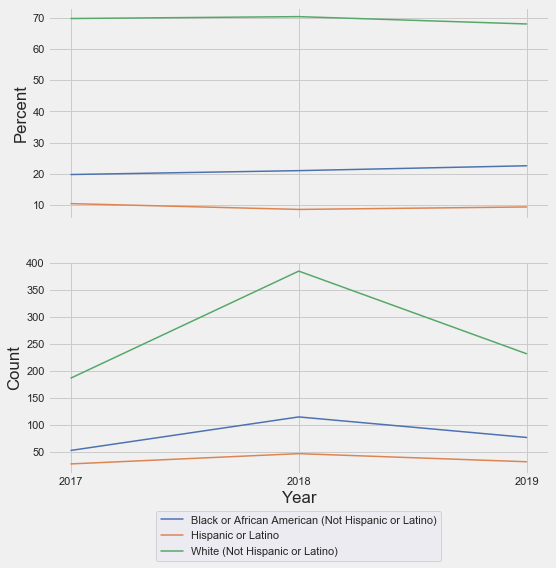

In [217]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col')
plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(7,13)})
sns.set_context('notebook')

percent = sns.lineplot(x="Year", \
             y="count", 
             hue="Ethnicity",
             data=eth_per_app_yr,
            legend=False,
             ax=axes[0])

percent.xaxis.set_major_locator(ticker.MultipleLocator())
percent.set_ylabel('Percent')

count = sns.lineplot(x="Year", \
             y="count", 
             hue="Ethnicity",
             data=ethnicity_count_year.reset_index(),
            legend='full',
            ax=axes[1])

count.xaxis.set_major_locator(ticker.MultipleLocator())
count.set_ylabel('Count')

handles, labels = count.get_legend_handles_labels()
count.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# plt.savefig('visualizations/ethnicity_count&percent_change2.png', bbox_inches='tight')

## Applicant Status

In [218]:
# how are applicant statuses distributed?
# this seems to be the most fined grained way to see 
# where candidates are droping off in the process

df['Applicant_Status'].value_counts()

AP - Incomplete                          1022
HM - No Show Fitness (Police)             485
HM - Reviewed Disqualified (Police)        62
HR - Withdrew                              51
HM - Written Exam Fail (Police)            26
HM - Fitness Test Info Sent (Police)       26
HM - Fitness Test Fail (Police)            24
Hired                                      24
HM - Personal Interview Fail (Police)      23
HM - Oral Board Fail (Police)              21
AP - Qualified (emailed)                   17
HM - Background Fail (Police)              15
OF - Withdrawn                             13
AP - Not Qualified                         12
HM - No Show Written (Police)              11
HM - Polygraph Fail (Police)               11
INTV - Withdrew                             3
HR - Unable to contact                      3
HM - Personal Interview Pass (Police)       2
VF - Disqualified                           1
HM - Written Exam Pass (Police)             1
Name: Applicant_Status, dtype: int

In [219]:
# groupby + size() is a great way to find the count of a group without having to 
# call out count() and include a specific column to count by

df.loc[df['Applicant_Status'] == 'Hired'].groupby(['Year', 'Ethnicity']).size()

Year  Ethnicity                                         
2017  Black or African American (Not Hispanic or Latino)     1
      Hispanic or Latino                                     1
      White (Not Hispanic or Latino)                        11
2018  Black or African American (Not Hispanic or Latino)     1
      White (Not Hispanic or Latino)                         4
2019  No Response                                            1
      White (Not Hispanic or Latino)                         5
dtype: int64

In [220]:
# copy series and translate into df
applicant_status_count = df['Applicant_Status'].value_counts().reset_index().copy()

In [221]:
# what are the top 4 applicant statuses?
applicant_status_count.iloc[0:4]

,index,Applicant_Status
0,AP - Incomplete,1022
1,HM - No Show Fitness (Police),485
2,HM - Reviewed Disqualified (Police),62
3,HR - Withdrew,51


In [222]:
# summarize all ethnicities other than the top 4
applicant_status_count = applicant_status_count.iloc[0:4].append(applicant_status_count.iloc[4:20].sum(), ignore_index=True)

applicant_status_count.iloc[4,0] = 'Other'

In [223]:
ethnicity_counts

,index,Ethnicity
0,White (Not Hispanic or Latino),955
1,No Response,375
2,Black or African American (Not Hispanic or Lat...,280
3,Hispanic or Latino,128
4,Other,115


(-1.1108706904702437,
 1.1020434015764446,
 -1.1102862999827974,
 1.1004898238087046)

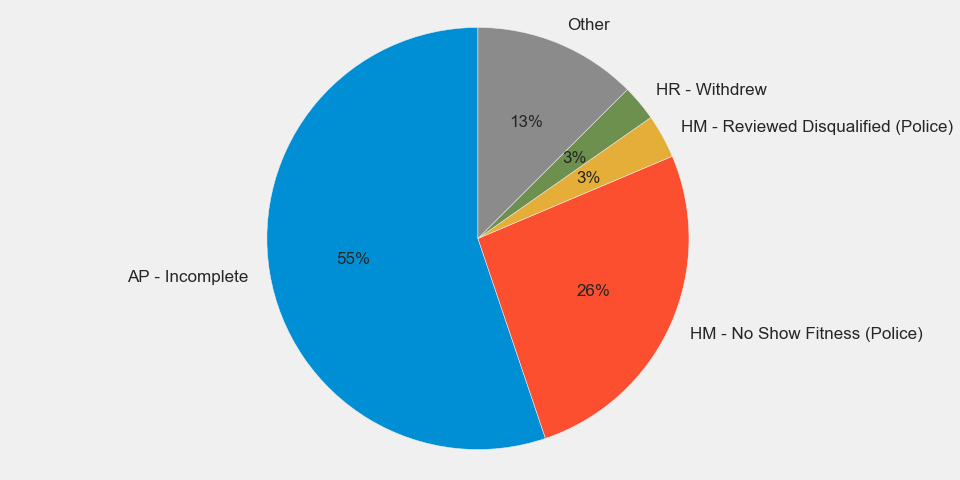

In [259]:
fig1, ax1 = plt.subplots(figsize=(15,8))
plt.style.use('fivethirtyeight')

ax1.pie(applicant_status_count['Applicant_Status'], 
        labels=applicant_status_count['index'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig("visualizations/applicant status.png")

### Compute percent of each status per ethnicity per year

In [225]:
ethnicity_status_year = app_status_by_ethnicity.groupby(['Ethnicity', 'Year', 'Applicant_Status'])['Ethnicity'].agg(['count'])

# groupby Ethnicity & Year, then compute percent
ethnicity_status_year_percent = ethnicity_status_year.groupby(level=[0, 1]).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index().rename(columns={'count': 'Percent'})

In [226]:
ethnicity_status_year.reset_index().rename(columns={'count': 'Count'}).head()

,Ethnicity,Year,Applicant_Status,Count
0,Black or African American (Not Hispanic or Lat...,2017,AP - Incomplete,25
1,Black or African American (Not Hispanic or Lat...,2017,HM - No Show Fitness (Police),24
2,Black or African American (Not Hispanic or Lat...,2017,HM - Reviewed Disqualified (Police),2
3,Black or African American (Not Hispanic or Lat...,2017,HR - Withdrew,2
4,Black or African American (Not Hispanic or Lat...,2018,AP - Incomplete,70


In [227]:
ethnicity_status_year_percent.head()

,Ethnicity,Year,Applicant_Status,Percent
0,Black or African American (Not Hispanic or Lat...,2017,AP - Incomplete,47.169811
1,Black or African American (Not Hispanic or Lat...,2017,HM - No Show Fitness (Police),45.283019
2,Black or African American (Not Hispanic or Lat...,2017,HM - Reviewed Disqualified (Police),3.773585
3,Black or African American (Not Hispanic or Lat...,2017,HR - Withdrew,3.773585
4,Black or African American (Not Hispanic or Lat...,2018,AP - Incomplete,60.869565


In [228]:
ethnicity_status_year.reset_index().head()

,Ethnicity,Year,Applicant_Status,count
0,Black or African American (Not Hispanic or Lat...,2017,AP - Incomplete,25
1,Black or African American (Not Hispanic or Lat...,2017,HM - No Show Fitness (Police),24
2,Black or African American (Not Hispanic or Lat...,2017,HM - Reviewed Disqualified (Police),2
3,Black or African American (Not Hispanic or Lat...,2017,HR - Withdrew,2
4,Black or African American (Not Hispanic or Lat...,2018,AP - Incomplete,70


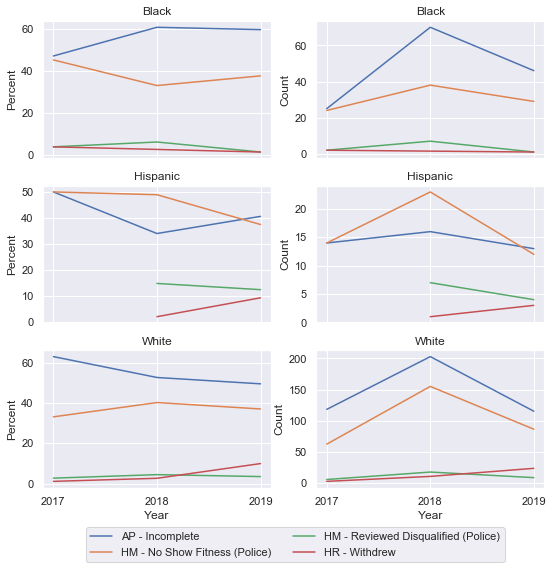

In [251]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex='col')

# plt.figure(figsize=(8, 8))
sns.set(rc={'figure.figsize':(8,8)})
sns.set_context('notebook')

# Black Ethnicity
black_percent = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'].str.contains('Black')],
             ax=ax[0, 0],
            legend=False)

black_percent.xaxis.set_major_locator(ticker.MultipleLocator())
black_percent.set_title('Black')
black_percent.set_xlabel('')

black_count = sns.lineplot(x="Year", \
             y="Count", 
             hue="Applicant_Status",
             data=ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})[ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})['Ethnicity'].str.contains('Black')],
             ax=ax[0, 1],
            legend=False)

black_count.xaxis.set_major_locator(ticker.MultipleLocator())
black_count.set_title('Black')
black_count.set_xlabel('')


# Hispanic Ethnicity
hispanic_percent = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'] == 'Hispanic or Latino'],
             ax=ax[1, 0],
            legend=False)

hispanic_percent.xaxis.set_major_locator(ticker.MultipleLocator())
hispanic_percent.set_title('Hispanic')
hispanic_percent.set_xlabel('')

hispanic_count = sns.lineplot(x="Year", \
             y="Count", 
             hue="Applicant_Status",
             data=ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})[ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})['Ethnicity'] == 'Hispanic or Latino'],
             ax=ax[1, 1],
            legend=False)

hispanic_count.xaxis.set_major_locator(ticker.MultipleLocator())
hispanic_count.set_title('Hispanic')
hispanic_count.set_xlabel('')


# White Ethnicity
white_percent = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'].str.contains('White')],
             ax=ax[2, 0],
            legend=False)

white_percent.xaxis.set_major_locator(ticker.MultipleLocator())
white_percent.set_title('White')

white_count = sns.lineplot(x="Year", \
             y="Count", 
             hue="Applicant_Status",
             data=ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})[ethnicity_status_year.reset_index().rename(columns={'count': 'Count'})['Ethnicity'].str.contains('White')],
             ax=ax[2, 1],
            legend='full')

white_count.xaxis.set_major_locator(ticker.MultipleLocator())
white_count.set_title('White')

handles, labels = white_count.get_legend_handles_labels()
white_count.legend(handles=handles[1:], labels=labels[1:], loc='upper right', bbox_to_anchor=(.85, -0.25), ncol=2)

# fig.legend()

# plt.tight_layout()
# plt.savefig('visualizations/applicant_status_by_ethnicity_percent_count.png', bbox_inches='tight')

### How has the count of applications by ethnicities changed over the years?

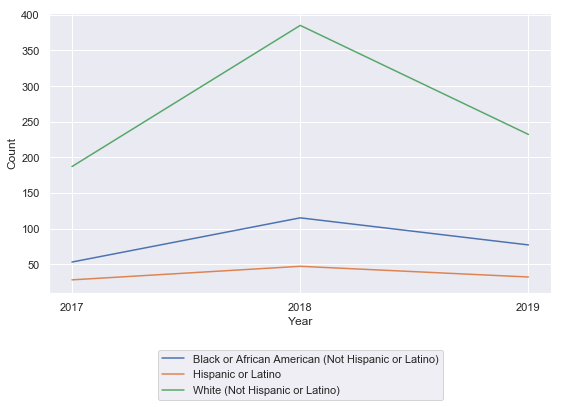

In [253]:
fig, axes = plt.subplots()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_context('notebook')

sns.lineplot(x="Year", \
             y="count", 
             hue="Ethnicity",
             data=ethnicity_count_year.reset_index())

axes.xaxis.set_major_locator(ticker.MultipleLocator())
axes.set_ylabel('Count')

handles, labels = axes.get_legend_handles_labels()
# handles and labels kwargs necessary here to remove label from legend
axes.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -.185), ncol=1)
plt.tight_layout()

# plt.savefig('visualizations/ethnicity_count_change_over_time.png')

### How has the means of advertising the police officer job changed over time?

In [231]:
ad_method = df[['Ethnicity', 'Year', 'Source', 'Applicant_Apply_Method']].copy()

In [232]:
# lump together all sources other than the top 6
ad_method.loc[ad_method['Source'].isin(ad_method['Source'].value_counts().iloc[6:11].index),'Source'] = 'Other'

In [233]:
ad_method = ad_method[ad_method['Ethnicity'].isin(app_status_by_ethnicity['Ethnicity'].value_counts().head(3).index)]

In [234]:
ad_method.groupby(['Year', 'Source'])['Source'].agg(['count']).reset_index().head()

,Year,Source,count
0,2017,Company Website,35
1,2017,Employee Referral,18
2,2017,Internet/Job Board,193
3,2017,Job/Career Fair,5
4,2017,Other,57


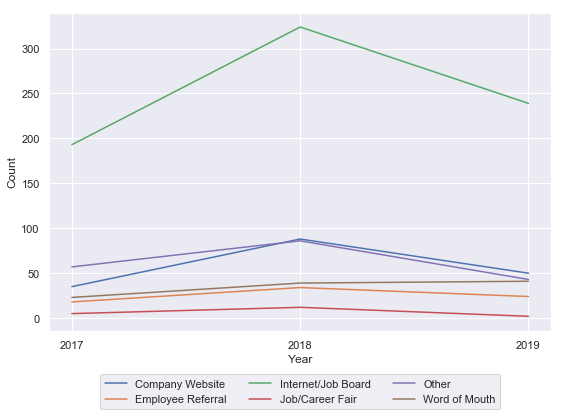

In [235]:
fig, axes = plt.subplots()
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context('notebook')
# plt.style.use('fivethirtyeight')

sns.lineplot(x="Year", 
             y="count", 
             hue="Source",
             data=ad_method.groupby(['Year', 'Source'])['Source'].agg(['count']).reset_index())

axes.xaxis.set_major_locator(ticker.MultipleLocator())
axes.set_ylabel('Count')

handles, labels = axes.get_legend_handles_labels()
# handles and labels kwargs necessary here to remove label from legend
axes.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -.12), ncol=3)
plt.tight_layout()

# plt.savefig('visualizations/add_method_over_time.png')

In [236]:
ad_method_grouped = ad_method.groupby(['Ethnicity','Year', 'Source'])['Source'].agg(['count']).reset_index()

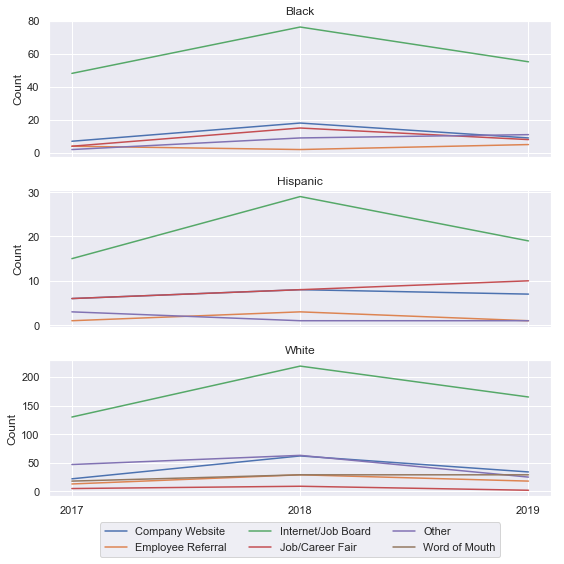

In [256]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='col')
sns.set(rc={'figure.figsize':(8,8)})
sns.set_context('notebook')
# plt.style.use('fivethirtyeight')

black = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'].str.contains('Black')],
             ax=axes[0],
            legend=False)
black.set_ylabel('Count')


black.xaxis.set_major_locator(ticker.MultipleLocator())
black.set_title('Black')
black.set_xlabel('')

hispanic = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'] == 'Hispanic or Latino'],
             ax=axes[1],
             legend=False)
hispanic.set_ylabel('Count')

hispanic.xaxis.set_major_locator(ticker.MultipleLocator())
hispanic.set_title('Hispanic')
hispanic.set_xlabel('')

white = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'].str.contains('White')],
             ax=axes[2],
             legend='full')
white.set_ylabel('Count')

white.xaxis.set_major_locator(ticker.MultipleLocator())
white.set_title('White')
white.set_xlabel('')

handles, labels = white.get_legend_handles_labels()
white.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
# plt.savefig('visualizations/add_method_by_ethnicity_over_time.png')

## Applicant Gender

In [238]:
df['Gender'].value_counts()

Male                    1248
Female                   226
Prefer not to answer       4
Name: Gender, dtype: int64

In [239]:
# exclude 'Prefer not to answer since they make up such a small amount'
df['Gender'].value_counts().iloc[0:2].values

array([1248,  226], dtype=int64)

(-1.1065048154584083,
 1.105268786767811,
 -1.1056730423324899,
 1.1002701448729757)

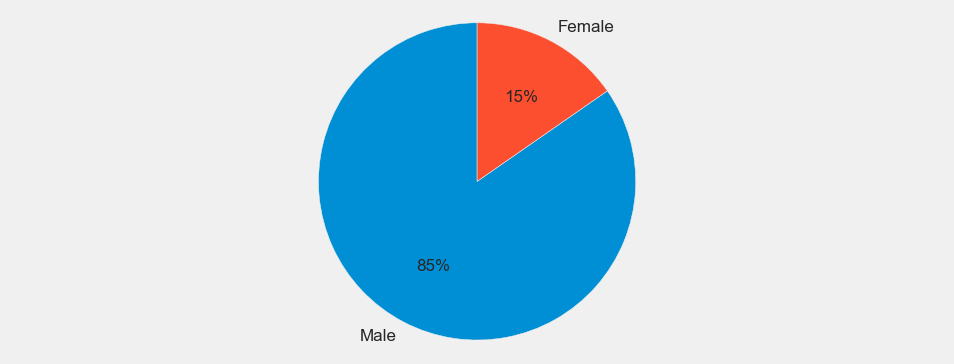

In [258]:
fig1, ax1 = plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')

ax1.pie(df['Gender'].value_counts().iloc[0:2].values, 
        labels=df['Gender'].value_counts().iloc[0:2].index, 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig("visualizations/applicant gender.png")

In [241]:
# for applicants that have been hired, what are their ethnicities?
df[df['Applicant_Status'] == 'Hired']['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                        20
Black or African American (Not Hispanic or Latino)     2
Hispanic or Latino                                     1
No Response                                            1
Name: Ethnicity, dtype: int64

In [242]:
# how is the means of getting the word out distributed by channels?
df['Source'].value_counts()

# based on these results it seems that South Bend has been proactive to advertise the job in a targeted way

Internet/Job Board        1158
Company Website            188
Other                      161
Word of Mouth              116
Employee Referral           85
Job/Career Fair             21
College/University          16
Radio/TV                    13
Agency                      10
Newspaper                    7
Community Organization       2
Name: Source, dtype: int64

In [243]:
# how are applicant methods distributed
df['Applicant_Apply_Method'].value_counts()

# based on these results South Bend has been proactive at making it easier to apply on a phone,
# which is going to appeal more to younger applicants

Mobile    954
Web       817
ATS        82
Name: Applicant_Apply_Method, dtype: int64

(-1.1063396358747415,
 1.1183686863100932,
 -1.108660765791884,
 1.1004124174186611)

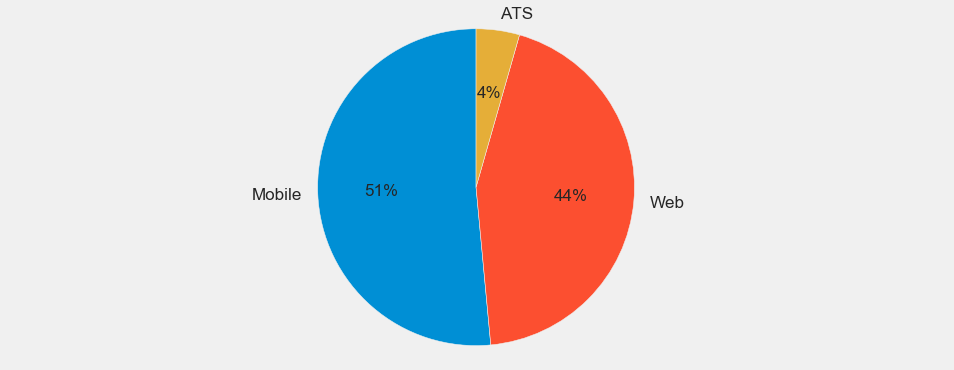

In [244]:
fig1, ax1 = plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')

ax1.pie(df['Applicant_Apply_Method'].value_counts().values, 
        labels=df['Applicant_Apply_Method'].value_counts().index, 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig("visualizations/applicant apply method.png")

## South Bend Census/Police Force Data

In [245]:
census_data = pd.DataFrame({
    'Ethnicity':['White', 'Black', 'Hispanic'],
    'Count':[55, 26.5, 14.7]
})

In [246]:
census_data

,Ethnicity,Count
0,White,55.0
1,Black,26.5
2,Hispanic,14.7


In [247]:
police_force_makeup = pd.DataFrame({
    'Ethnicity':['White', 'Black', 'Hispanic'],
    'Percent':[88, 5, 5]
})

In [248]:
police_force_makeup

,Ethnicity,Percent
0,White,88
1,Black,5
2,Hispanic,5


Text(0.5, 1.0, 'Police Department Makeup')

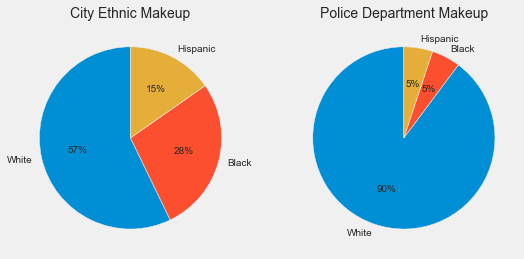

In [249]:
# figsize=(10,4)
fig = plt.figure()
census = fig.add_subplot(1, 2, 1)
police_composition = fig.add_subplot(1, 2, 2)
plt.style.use('fivethirtyeight')

census.pie(census_data['Count'], 
        labels=census_data['Ethnicity'], 
        startangle=90, 
        textprops={'fontsize': 10}, 
        autopct='%1.f%%')
census.set_title('City Ethnic Makeup', fontsize= 14)

police_composition.pie(police_force_makeup['Percent'], 
        labels=police_force_makeup['Ethnicity'], 
        startangle=90, 
        textprops={'fontsize': 10}, 
        autopct='%1.f%%')
police_composition.set_title('Police Department Makeup', fontsize= 14)

# plt.savefig("visualizations/south_bend_city_vs_pd_composition.png", bbox_inches='tight')